# 動態網頁爬蟲 - 使用 Selenium

* 了解 Selenium 用於動態網頁爬蟲的原理
* 能夠使用 Selenium 撰寫動態網頁爬蟲

## 使用 Requests 爬蟲

In [1]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://hahow.in/courses")
d = BeautifulSoup(r.text, 'lxml')

d.body.text
# 只會爬蟲 JavaScript 語法，沒有網頁內容中的資料

'[Element.prototype,Document.prototype,DocumentFragment.prototype].forEach((function(e){e.hasOwnProperty("prepend")||Object.defineProperty(e,"prepend",{configurable:!0,enumerable:!0,writable:!0,value:function(){var e=Array.prototype.slice.call(arguments),t=document.createDocumentFragment();e.forEach((function(e){var n=e instanceof Node;t.appendChild(n?e:document.createTextNode(String(e)))})),this.insertBefore(t,this.firstChild)}})}));var loadDeferredStyles=function(){var e=document.getElementById("deferred-styles"),t=document.createElement("div");t.innerHTML=e.textContent,document.head.prepend(t),e.parentElement.removeChild(e)},raf=window.requestAnimationFrame||window.mozRequestAnimationFrame||window.webkitRequestAnimationFrame||window.msRequestAnimationFrame;raf?raf((function(){window.setTimeout(loadDeferredStyles,0)})):window.addEventListener("load",loadDeferredStyles)!function(t,h,e,j,s,n){t.hj=t.hj||function(){(t.hj.q=t.hj.q||[]).push(arguments)},t._hjSettings={hjid:301739,hjsv:6},

## 動態模擬瀏覽器行為

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup

In [23]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://hahow.in/courses")

'<html lang="zh-TW" data-react-helmet="lang"><head><div><link href="https://hahow.in/static/css/24.454d8622.chunk.css" rel="stylesheet"></div><meta name="description" content="超過百堂有趣的線上課程，讓你輕鬆自學那些學校沒有教的事！" data-react-helmet="true"><meta property="fb:app_id" content="1287520191288194" data-react-helmet="true"><meta property="og:locale" content="zh-TW" data-react-helmet="true"><meta property="og:description" content="Hahow 提供最多元有趣的線上課程，並透過獨特的課程募資機制，讓熱愛自學與交換技能的你，在家就可以完成高效率的線上學習與成就！" data-react-helmet="true"><meta property="og:url" content="https://hahow.in/" data-react-helmet="true"><meta property="og:image" content="https://hahow.in/static/images/og-image.jpg" data-react-helmet="true"><meta property="og:type" content="article" data-react-helmet="true"><meta property="og:site_name" content="Hahow - 好學校" data-react-helmet="true"><meta property="og:title" content="Hahow 好學校 | 最有趣的線上課程平台 | 自學那些學校沒教的事" data-react-helmet="true"><meta name="google-site-verification" content="dxQXUxo-Ypo_w3JIINg
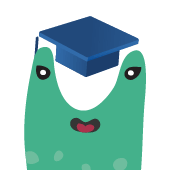
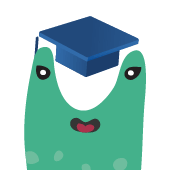

In [65]:
# 取得資料（等瀏覽器資料出現後才執行）
html_source = browser.page_source
html_source

In [66]:
# 取得資料
html_source = browser.page_source

soup = BeautifulSoup(html_source, 'html.parser')
soup.find('h4', class_='title').text
# 改用 selenium 就可以正常取得

'【AI 深度學習】新手入門應用篇'

## 作業目標

* 1. 根據範例使用 selenuim 取出 Hahow 網站中所有課程的資料，並用一個適合的資料結構儲存（Hint: 將所有資料存在一個變數當中取出）
* 2. 剛剛的做法只能取出第一頁，試著取出所有頁面的資料。


In [76]:
import time

In [106]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://hahow.in/courses")

In [107]:
link_list=[]
for i in range(1,21):
    link_list.append("https://hahow.in/courses?page="+str(i))

In [108]:
info={}
for link in link_list:
    browser.get(link)
    time.sleep(10)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    courses=soup.find_all(class_='sc-10r5mg2-0')
    for course in courses:
        title=course.find('h4', class_='title').text
        price=course.find_all('span')[-1].text
    
        info.update({title:price})
info



{'中小企業政府免費補助計畫自己來': 'NT$3,188',
 '從零開始，Unity3D 射擊遊戲製作真簡單': 'NT$1,380',
 '手繪珠寶設計入門：完成你的第一件珠寶設計': 'NT$1,900',
 '職場寫作課：從個人品牌到自媒體': 'NT$1,688',
 '跨國實戰：新鮮人用設計思考寫出好履歷': 'NT$900',
 '紙上的美妝師：連禾時尚彩妝畫': 'NT$1,680',
 '顧客分類大師：Python x RFM 會員經營新觀點': 'NT$1,988',
 '翻轉文字：給孩子好玩的創意寫作課！': 'NT$1,600',
 '大人的蠟筆畫：活用油畫知識，寫實生活微光': 'NT$1,500',
 '機器學習攻略：實戰心法到求職技巧': 'NT$1,800',
 '法式甜點在地魂製作攻略－日日在家菓實日': 'NT$2,680',
 '林長揚職場簡報術：一次搞定所有工作簡報！': 'NT$1,800',
 '概念式時尚插畫｜我的小小時裝週': 'NT$1,980',
 '羅寶鴻的安定教養課：12 個對話練習與心法': 'NT$1,188',
 '七日減醣計畫「一週持續執行！」邊吃邊享瘦': 'NT$1,080',
 '閱讀攝影的眼神 - 啟動你的影像理解力': 'NT$1,480',
 '手機 App 開發入門：App Inventor 2 實作': 'NT$800',
 '全民防疫通識課：陳建仁副總統來開講': 'NT$0',
 '省錢攝影術：零基礎拍好美食＆商品！': 'NT$1,690',
 'Linux 我來教: CentOS/ RHEL 8 新世代雲端': 'NT$3,300',
 '口譯員浩爾的打獵式聆聽＆資訊處理術': 'NT$1,499',
 '資料變決策！從零上手 Tableau 大數據視覺化': 'NT$2,580',
 '互動藝術程式創作入門 Creative Coding ': 'NT$2,400',
 '人生管理學：把自己當成公司經營': 'NT$2,049',
 '薩克斯風 - 13 堂基本功吹出專輯的美聲': 'NT$1,500',
 '用實際案例學設計-美編的 InDesign 排版課': 'NT$1,600',
 '動盪時代的資產配置：王伯達人生財務規劃學': 'NT$3,500',
 '手繪轉電繪